<a href="https://colab.research.google.com/github/HernanDL/Noise-Cancellation-Using-GenAI/blob/main/Testing_Dataset_Urbansound8k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Certainly! Here’s a description of the last code example that you can include in your Colab file:

---

### Code Description: Extracting and Normalizing Audio from UrbanSound8K

The provided code demonstrates how to interact with the **UrbanSound8K** dataset to extract audio signals for analysis. The main functionalities of the code include:

1. **Initialization and Loading**:
   - The code begins by initializing the UrbanSound8K dataset using the `soundata` library and loading all available audio clips. It filters these clips based on specific class IDs representing various urban sounds, such as car horns, sirens, and drilling.

2. **Function for Random Clip Extraction**:
   - A function named `get_random_clip_audio_signal` is defined to encapsulate the logic for selecting a random audio clip from the filtered dataset. This function accepts parameters for `duration` (in seconds) and `sample_rate`, allowing flexibility in extracting audio segments.
   - The function ensures that previously returned audio waves are tracked to avoid duplicates by using a set to store hashes of the normalized audio signals.

3. **Audio Signal Processing**:
   - The code extracts the specified duration of audio (defaulting to 2 seconds) from a randomly selected clip and normalizes the audio signal to ensure that its amplitude values lie between -1 and 1.
   - Additionally, it converts the normalized audio to decibels (dB) for visualization purposes.

4. **Visualization**:
   - Finally, the code plots the waveform of the extracted audio segment, displaying time on the X-axis (in seconds) and amplitude on the Y-axis (in dB). This provides a visual representation of the audio signal's characteristics.

This code serves as a foundation for further analysis or machine learning tasks related to urban sound classification, enabling users to easily extract and visualize audio data from the UrbanSound8K dataset.

---


In [17]:
# Install necessary libraries
!pip install soundata librosa soundfile numpy matplotlib

import soundata

# Initialize the UrbanSound8K dataset
dataset = soundata.initialize('urbansound8k', data_home='/root/sound_datasets/urbansound8k/tests')



In [ ]:
# Download the dataset if not already downloaded
dataset.download()
dataset.validate()

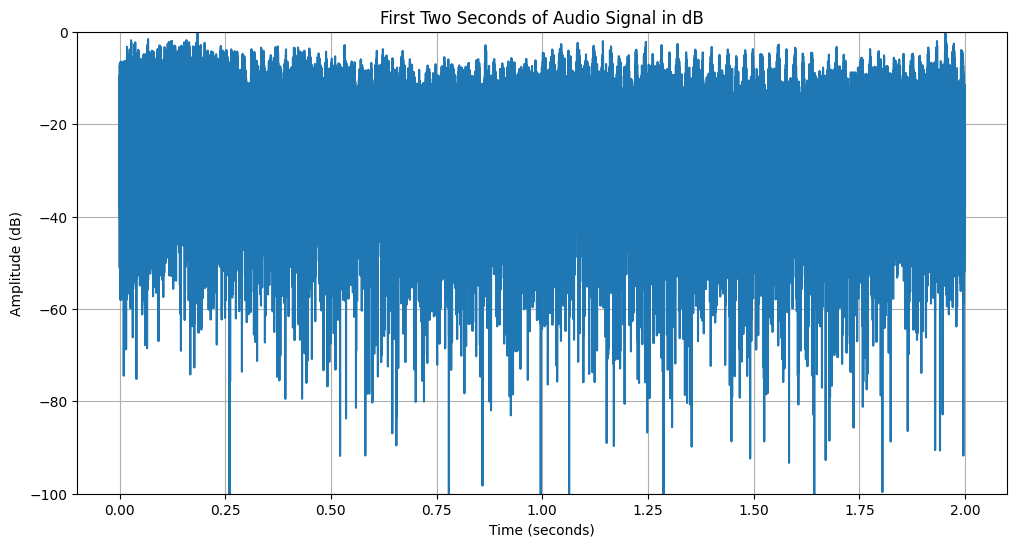

In [21]:
# Import required libraries
import numpy as np
import librosa
import random
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Define the class IDs you want to load
class_ids = [0, 1, 4, 5, 7, 8]

'''
Selected categories to be used in the Noise Cancellation Project

0 = air_conditioner
1 = car_horn
4 = drilling
5 = engine_idling
7 = jackhammer
8 = siren
'''

# Load all clips in the dataset
clips = dataset.load_clips()

# Filter clips for the specified class IDs (only once)
filtered_clips = {clip_id: clip for clip_id, clip in clips.items() if clip.class_id in class_ids}

# Keep track of previously returned waves
previous_waves = set()

def get_random_clip_audio_signal(duration=2, sample_rate=22050):
    """
    Get a random audio signal from filtered clips.

    Parameters:
    - duration: Duration in seconds to extract from the clip.
    - sample_rate: Sample rate for loading the audio signal.

    Returns:
    - normalized_wave: Normalized audio wave of the extracted duration.
    """
    # Select a random clip from the filtered clips
    random_clip_id = random.choice(list(filtered_clips.keys()))
    random_clip = filtered_clips[random_clip_id]

    # Load the audio file
    audio_signal, _ = librosa.load(random_clip.audio_path, sr=sample_rate)

    # Extract the desired duration of audio (if available)
    num_samples = duration * sample_rate
    extracted_audio = audio_signal[:num_samples]

    # Normalize the extracted audio signal
    normalized_wave = extracted_audio / np.max(np.abs(extracted_audio))

    # Keep track of returned waves to avoid duplicates (using a simple hash)
    wave_hash = hash(tuple(normalized_wave))

    if wave_hash in previous_waves:
        return get_random_clip_audio_signal(duration, sample_rate)  # Recursively get a new wave if it's a duplicate

    previous_waves.add(wave_hash)  # Track this wave

    return normalized_wave

sample_rate=44100

# Example usage of the function
normalized_wave = get_random_clip_audio_signal(duration=3, sample_rate=sample_rate)

# Play the extracted first two seconds of audio
display(Audio(normalized_wave, rate=sample_rate))

# Convert normalized audio to dB for visualization
def amplitude_to_db(amplitude):
    return 20 * np.log10(np.abs(amplitude) + 1e-10)  # Adding a small value to avoid log(0)

audio_db_first_two_seconds = amplitude_to_db(normalized_wave)

# Create time axis in seconds for the first two seconds
time_axis_first_two_seconds = np.linspace(0, 2, num=len(audio_db_first_two_seconds))

# Plotting the waveform of the first two seconds in dB with time in seconds
plt.figure(figsize=(12, 6))
plt.plot(time_axis_first_two_seconds, audio_db_first_two_seconds)
plt.title('First Two Seconds of Audio Signal in dB')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.ylim(-100, 0)  # Set y-axis limits for better visualization
plt.show()

### UrbanSound8K Dataset Overview

The **UrbanSound8K** dataset is a comprehensive collection of urban sound excerpts, specifically designed for audio classification tasks. It contains **8,732 labeled sound excerpts**, each lasting up to **4 seconds**, categorized into **10 distinct classes**: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, and street_music. These sound excerpts were sourced from field recordings uploaded to [Freesound](https://www.freesound.org) and are organized into ten folds to facilitate cross-validation in machine learning experiments.

The dataset is widely used for training models in urban sound classification and has been referenced in various research projects. For example, a project aimed at building a neural network for classifying sounds from the UrbanSound8K dataset demonstrates methodologies such as feature extraction using the Librosa library, dimensionality reduction through PCA, and convolutional neural network (CNN) training.

Researchers and developers can utilize this dataset to explore various aspects of sound classification, including hyperparameter tuning and model evaluation through 10-fold cross-validation.

For more detailed information about the dataset and its structure, you can refer to the following resources:

- **UrbanSound8K Dataset**: [UrbanSound8K on Weebly](https://urbansounddataset.weebly.com/urbansound8k.html)
- **Urban Sound Classification Project**: [GitHub Repository](https://github.com/tomfran/urban-sound-classification)
- **Dataset Reference**: [Papers with Code - UrbanSound8K](https://paperswithcode.com/dataset/urbansound8k-1)

---

This text provides a succinct overview of the UrbanSound8K dataset and includes references that you can easily incorporate into your Colab file.

Citations:
[1] https://github.com/tomfran/urban-sound-classification
[2] https://paperswithcode.com/dataset/urbansound8k-1
[3] https://soundata.readthedocs.io/en/latest/source/tutorial.html
[4] https://soundata.readthedocs.io/en/latest/source/soundata.html
[5] https://urbansounddataset.weebly.com/urbansound8k.html
[6] https://forum.posit.co/t/installing-a-package-with-modified-description-files-throws-md5-checksum-error/37846
[7] https://forum.audacityteam.org/t/interpretation-of-negative-decibels/81092
[8] https://www.reddit.com/r/audioengineering/comments/dkourt/why_do_we_measure_db_in_negatives/